### Add to final/master/presentation: 

* this model is a test of 2014-2015 data to see if they will hire us for building more models because of their other business needs. in the future, we would have year as a feature that is predicted. 

## Obtain and Understand Our Data 

In [220]:
#import pandas to view and clean data using dataframes
import pandas as pd 
#import numpy to perform calculations on the data easily  
import numpy as np 

#read the file as a dataframe
kc_df = pd.read_csv('kc_house_data.csv')

In [221]:
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [222]:
#replace the basement "?" with null
kc_df['sqft_basement'] = pd.to_numeric(kc_df['sqft_basement'], errors='coerce')

In [223]:
#Change the date column objects to be datetime entries.
kc_df.date = pd.to_datetime(kc_df.date, format='%m/%d/%Y')

We notice that waterfront is a categorical set of data - a 1 indicates that something is on the water, and a 0 means it is not. A null value means that it is unknown whether or not the property is on the water. We will change the waterfront type to a categorical variable and then use dummy variables to append two dummy variable columns to the end of the dataframe. 

In [224]:
water_series = pd.Series(kc_df.waterfront)
kc_df['waterfront'] = water_series.astype('category')
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null category
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(1), datetime64[ns](1), float64(8), int64(11)
mem

In [225]:
kc_df = pd.get_dummies(kc_df)
kc_df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,2014-10-13 00:00:00,2014-12-09 00:00:00,2015-02-25 00:00:00,2014-12-09 00:00:00,2015-02-18 00:00:00
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
view,0,0,0,0,0
condition,3,3,3,5,3


## Latitude and Longitude

In [226]:
coords = tuple(zip(kc_df.loc[:,'lat'], kc_df.loc[:,'long']))
coordinates = pd.Series(coords)
kc_df['coordinates'] = coordinates


In [227]:
#find the distance between property's location and downtown Seattle 
#Haversine is best to use since it's simple and easy to use and our distances are not very great
#it approximates the earth is a sphere and that's okay 
from haversine import haversine 
downtown_seattle = (47.3633, -122.19584)
miles_from_dt_seattle = []
for row in kc_df.coordinates:
    a = haversine(row, downtown_seattle, unit='mi')
    miles_from_dt_seattle.append(a)    

In [228]:
kc_df['seattle_dist'] = miles_from_dt_seattle

In [229]:
#let's do the same thing for downtown bellevue 
from haversine import haversine 
bellevue = (47.617382, -122.188503)
miles_from_dt_bellevue = []
for row in kc_df.coordinates:
    a = haversine(row, bellevue, unit='mi')
    miles_from_dt_bellevue.append(a)

In [230]:
kc_df['bellevue_dist'] = miles_from_dt_bellevue

Can I write a for loop for a list of popular places? Perhaps even weighting certain columns, and then select the minimum distance from those popular places, like ski resorts or stadiums.


*popular places*
tacoma dome 
seattle
bellevue 
kent station 
auburn
tukwila

Will finish later... 



In [231]:
# tacoma_dome = (47.239879, -122.426912)
# auburn_sndr = (47.306510, -122.231530)
# kent_sndr = ()
# from haversine import haversine 
# bellevue = (47.617382, -122.188503)
# miles_from_dt_bellevue = []
# for row in kc_df.coordinates:
#     a = haversine(row, bellevue, unit='mi')
#     miles_from_dt_bellevue.append(a)

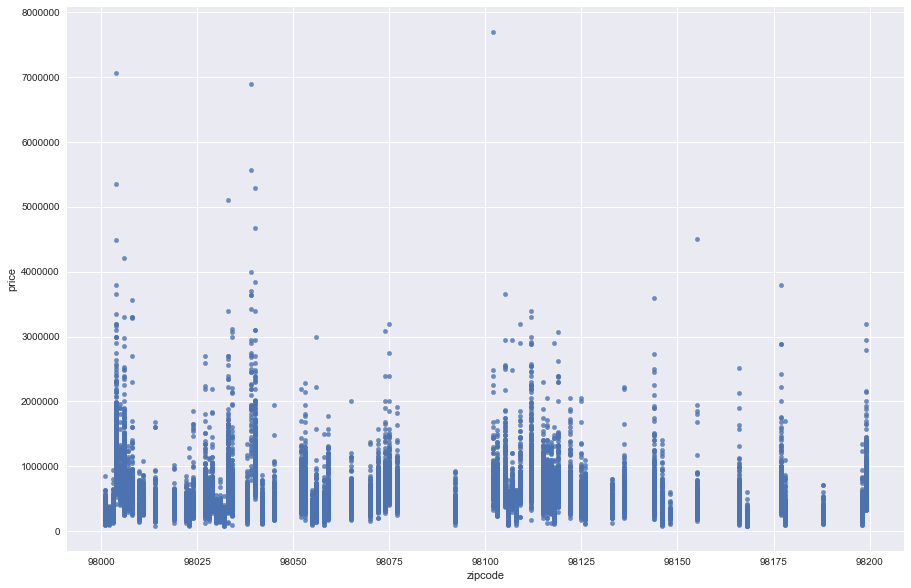

<Figure size 576x396 with 0 Axes>

In [233]:
kc_df.plot(kind="scatter", x="zipcode", y="price", alpha=0.8, figsize=(15,10))
plt.show()
plt.tight_layout()

In [199]:
price_zips_df = kc_df[['price','zipcode']]


In [202]:
median_zip_prices_df = price_zips_df.groupby(['zipcode']).median()

In [236]:
median_zip_prices_df.sort_values(by=['price']).tail(20)

,price
zipcode,
98027,570500.0
98122,572000.0
98029,575000.0
98052,615000.0
98053,635000.0
98074,642000.0
98077,652475.0
98105,675000.0
98033,678350.0


In [237]:
pine_lake = (47.587821, -122.034408) #high median home value from 98075
magnolia = (47.649777, -122.399839) # " from 98199
redmond = (47.618837, -122.046835)
woodinville = (47.757905, -122.049466) #98074
kirkland = (47.676908, -122.192552)

#the way i did this (by hand) is not ideal, but we were pressed for time... 
#can i make a function that checks this? idk

In [179]:
kc_df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,2014-10-13 00:00:00,2014-12-09 00:00:00,2015-02-25 00:00:00,2014-12-09 00:00:00,2015-02-18 00:00:00
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
view,0,0,0,0,0
condition,3,3,3,5,3


Before we begin to explore the features, we'll drop id from our list of features, since we already have our information in a single dataframe and it will not help us to know the random id in order to predict the price. Also, waterfront_0.0 is redundant since it's just the inverse of waterfront_1.0 minus some null values. So, we'll drop that too, leaving 'waterfront' as our column with a 1 that indicates whether something is on the water or not. Later, we may change this to boolean values.

In [137]:
kc_df = kc_df.drop(['id', 'lat', 'long', 'waterfront_0.0'], axis=1) 

In [138]:
kc_df = kc_df.rename(columns={"waterfront_1.0": "waterfront"})

In [139]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
waterfront       21597 non-null uint8
coordinates      21597 non-null object
seattle_dist     21597 non-null float64
bellevue_dist    21597 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(10), object(1), uint8(

Now that we've cleaned up our data, we'll look at how the feature values are distributed.

## Exploring Our Data 

In [140]:
#import necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
#Find the statistical description of the features.
kc_df.describe().head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,waterfront,seattle_dist,bellevue_dist
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,540296.573506,3.373200,2.115826,2080.321850,15099.408760,1.494096,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,1986.620318,12758.283512,0.006760,16.242948,10.892362
std,367368.140101,0.926299,0.768984,918.106125,41412.636876,0.539683,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,685.230472,27274.441950,0.081944,7.524556,5.751166
min,78000.000000,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,0.000000,0.110846,0.339904
25%,322000.000000,3.000000,1.750000,1430.000000,5040.000000,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,0.000000,9.648626,7.057520


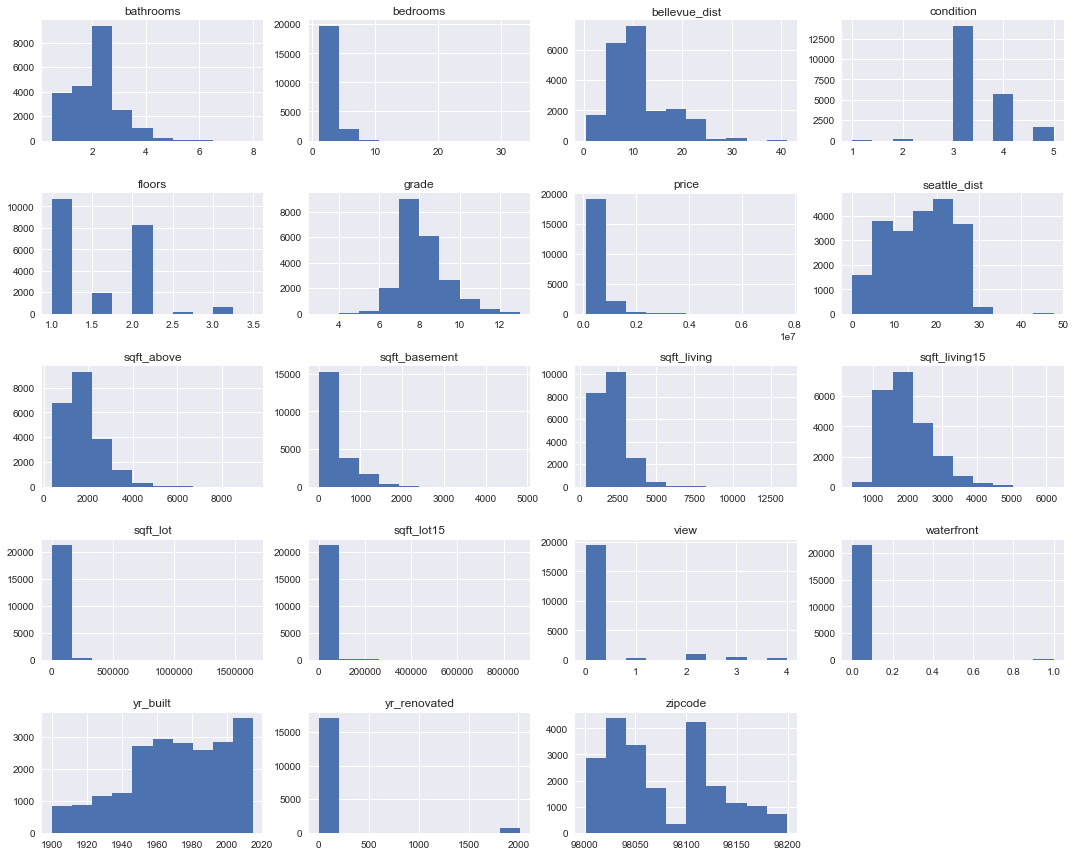

In [142]:
#make histograms of the features to visualize their distributions.
kc_df.hist(figsize=(15,12));
plt.tight_layout()

In [143]:
#check to see where features have very high Pearson correlation coefficients 
kc_df.corr()>.95

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,waterfront,seattle_dist,bellevue_dist
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


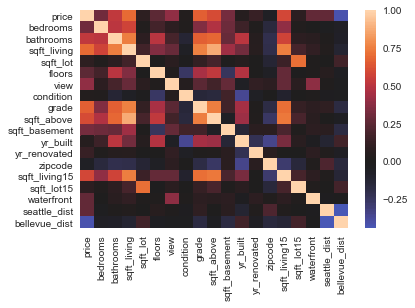

In [144]:
#make a heatmap to double check for multicollinearity 
sns.heatmap(kc_df.corr(), center=0);

From the heatmap and other graphs, we can see that no features are collinear, so we don't need to remove any from our dataset. 

## Modeling our data 

In [145]:
import statsmodels.api as sm
import statsmodels
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
plt.style.use('seaborn')

We are making our first mondel using one feature and seeing how it relates to price

In [146]:
f = 'price~sqft_above'
model = ols(formula=f, data=kc_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:40:17   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.976e+04   4737.581     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6684      2.404    111.767      0.000     263.957     273.380
==============================================================================
Omnibus:                    16492.245   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728366.432
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/tjjj/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


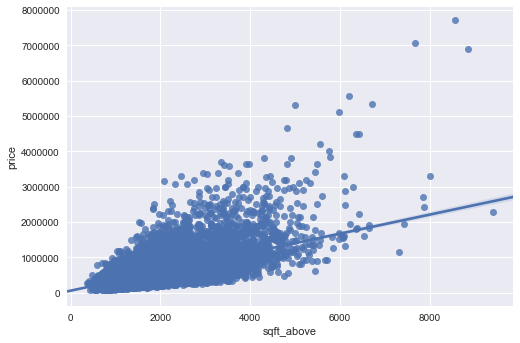

In [147]:
#This is what our first model looks like 
sns.regplot(x='sqft_above', y='price', data=kc_df);

## Making a multivariate model

For our first multivariate moedl, I'll make a new dataframe with only variables we suspect will be good predictors of the property price.

In [160]:
first_mv_model_df = kc_df.drop(['date','bedrooms', 'bathrooms', 'view', 'condition', 'grade', 
                             'sqft_above', 'sqft_basement','yr_built', 'yr_renovated', 
                             'zipcode', 'sqft_living15', 'sqft_lot15',
                             'coordinates'], axis=1) 

In [161]:
first_mv_model_df.head()

,price,sqft_living,sqft_lot,floors,waterfront,seattle_dist,bellevue_dist
0,221900.0,1180,5650,1.0,0,10.611129,8.001373
1,538000.0,2570,7242,2.0,0,25.373495,9.387358
2,180000.0,770,10000,1.0,0,25.940341,8.580441
3,604000.0,1960,5000,1.0,0,14.258617,11.636642
4,510000.0,1680,8080,1.0,0,18.877929,6.683720


In [162]:
#model the data 
outcome = 'price'
predictors = first_mv_model_df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [163]:
first_mv_model = ols(formula= formula, data=first_mv_model_df).fit()
first_mv_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     6733.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:45:02   Log-Likelihood:            -2.9600e+05
No. Observations:               21597   AIC:                         5.920e+05
Df Residuals:                   21590   BIC:                         5.921e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.052e+05   7580.362     13.881      0.000    9.04e+04     1.2e+05
sqft_living     253.7173      1.781    142.471      0.000     250.227     257.208
sqft_lot          0.2075      0.037      5.596      0.000       0.135       0.280
floors         6169.8089   2936.463      2.101      0.036     414.124    1.19e+04
waterfront     8.797e+05   1.81e+04     48.571      0.000    8.44e+05    9.15e+05
seattle_dist   5561.0434    219.467     25.339      0.000    5130.872    5991.215
bellevue_dist -1.849e+04    294.108    -62.856      0.000   -1.91e+04   -1.79e+04
==============================================================================
Omnibus:                    17331.765   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1211770.730
Skew:                           3.362   Prob(JB):                         0.00
Kurtosis:                      39.075   Cond. No.                     5.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Perhaps waterfront is not a great contender because it's skewing the data, and it's not boolean either. I'll remove it. 

In [165]:
#model the data again 
second_mv_model_df = first_mv_model_df.drop('waterfront', axis=1)
outcome2 = 'price'
predictors2 = second_mv_model_df.drop('price', axis=1)
pred_sum2 = "+".join(predictors2.columns)
formula2 = outcome2 + "~" + pred_sum2

In [167]:
second_mv_model = ols(formula= formula2, data=second_mv_model_df).fit()
second_mv_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     6859.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:45:39   Log-Likelihood:            -2.9712e+05
No. Observations:               21597   AIC:                         5.943e+05
Df Residuals:                   21591   BIC:                         5.943e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.973e+04   7982.712     12.493      0.000    8.41e+04    1.15e+05
sqft_living     262.3976      1.866    140.613      0.000     258.740     266.055
sqft_lot          0.2123      0.039      5.436      0.000       0.136       0.289
floors         3832.8981   3092.254      1.240      0.215   -2228.147    9893.944
seattle_dist   5395.2772    231.114     23.345      0.000    4942.278    5848.277
bellevue_dist -1.853e+04    309.752    -59.833      0.000   -1.91e+04   -1.79e+04
==============================================================================
Omnibus:                    18548.799   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1364110.859
Skew:                           3.745   Prob(JB):                         0.00
Kurtosis:                      41.207   Cond. No.                     2.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Turns out including waterfront has a better R^2.

## Selecting Features
I'm going to try and use some of the feature selectors instead of continuing ot try all the different values... will look into both versions tomorrow. 

In [ ]:

from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=500, n_features=4, random_state=0)
>>> estimator = SVR(kernel="linear")
>>> selector = RFE(estimator, 5, step=1)
>>> selector = selector.fit(X, y)
>>> selector.support_ 
array([ True,  True,  True,  True,  True, False, False, False, False,
       False])
>>> selector.ranking_
array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])